<a href="https://colab.research.google.com/github/hallam-flda/gambling_market_analyses/blob/main/Roulette_%26_Customer_Budgets_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Budget Constraints and Casino Profitability - A Simulation Based Approach II**



## **Introduction**
After the first attempt to simulate data for calculating stopping times I felt it would be better to use a statistical approach so that I could generate a distribution for the expected stopping time (bankruptcy or a top threshold). However, I have not been able to find a good source that shows how to do this.

One way is to simulate the amount of time taken to hit the stopping condition and fitting a distribution to that data.

### **Warning**
While the expectation for any supermartingale is that eventually the gambler's balance will go to zero, this could take a very large number of spins. I would want to restrict the number of spins a gambler can have as I did in the first simulation notebook. I don't know how this will affect the distribution (other than to create a second peak at the spin limit where variability is high).



## **Colours Betting**

Take the basic example of betting on colours with a starting balance of $X_0$ and £1 spins, how long will it take for the customer to reach zero on average?

We know from the Stochastic Processes work that for any value of $X_0$

<br>

$$
\mathbb{E}[\tau] = \frac{X_0}{b\cdot(1-2p)} = \frac{X_0}{1\cdot\left(1-2\cdot\left(\frac{18}{37}\right)\right)} = \frac{X_0}{0.027}
$$



<br>

But the solution for $\mathrm{Var}[\tau]$ is less clear.

## Python Simulations - Validation

To simulate this we need a function similar to the one we used in the first notebook but this time I'll tailor it to take a maximum number of spins and starting balance arguments as this is the relationship we're interested in w.r.t variance.

In [9]:
# Import necessary packages
from matplotlib import pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd

In [5]:
# Define the colours betting game with a list to track balance and number of spins (t)
def european_roulette_colour_betting(max_number_of_spins, starting_balance):
    balance = []
    t = [0]
    running_balance = starting_balance
    running_t = 0

    for _ in range(max_number_of_spins):
        if running_balance <= 0:  # Stop if bankrupt
            break
        outcome = random.randint(0, 36)

        # Assume 18/37 outcomes are wins (e.g., red or black)
        if outcome in range(0, 18):  # Winning outcomes
            running_balance += 1  # Win pays 1 unit
        else:
            running_balance -= 1  # Lose 1 unit

        # Track balance and time
        balance.append(running_balance)
        running_t += 1
        t.append(running_t)

    spins_to_bankruptcy = running_t if running_balance <= 0 else max_number_of_spins  # None if not bankrupt
    return t, balance, spins_to_bankruptcy

We know that for a starting balance of £100 from the formula the expected number of spins is $\frac{100}{0.027} = 3703$ but trying to find an accurate answer for what the variance is wasn't as simple so instead I'll take the sample variance and st.dev from a simulation for 10,000 customers.

In [ ]:
spins_to_bankruptcy = []
STARTING_BALANCE = 100
CUSTOMERS = 10000
MAX_SPINS = 50000

for i in range(CUSTOMERS):
  spin_list, customer_balance, customer_spins = european_roulette_colour_betting(MAX_SPINS,STARTING_BALANCE)
  spins_to_bankruptcy.append(customer_spins)

mean_spins = np.mean(spins_to_bankruptcy)
var_spins = np.var(spins_to_bankruptcy, ddof = 1)
st_dev_spins = np.std(spins_to_bankruptcy, ddof = 1)

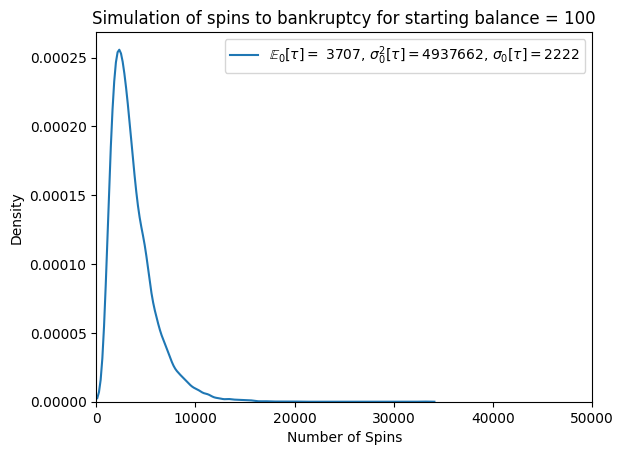

In [8]:
sns.kdeplot(spins_to_bankruptcy, label=f'$\mathbb{{E}}_0[\\tau] =$ {mean_spins:.0f}, $\sigma_0^{2}[\\tau] = {var_spins:.0f}$, $\sigma_0[\\tau] = {st_dev_spins:.0f}$', clip=(100, None))
plt.title(f"Simulation of spins to bankruptcy for starting balance = {STARTING_BALANCE}")
plt.xlabel('Number of Spins')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,50000)
plt.show()

So for this simulation we have the following summary statistics of the distribution of stopping times.

 <br>
 <center>

| Statistic | Value |
|:---:|:---:|
| Sample Mean, $\mu$ | 3707 |
| Sample Variance, $s^2$ | 4,937,662|
| Sample St Dev, $s$ | 2,222 |

</center>
<br>

But obviously this will change with every simulation, so to be sure this is a realistic estimate, I will simulate the same scenario but 10 times and take the average of the sample means and variances. Not sure if this is scientifically sound but it's just to validate any AI output.



In [13]:
# This takes a long time to run, save the output to drive and then load rather than simming every time

mean_list = []
var_list = []
st_dev_list = []

for j in range(10):

  spins_to_bankruptcy = []
  STARTING_BALANCE = 100
  CUSTOMERS = 10000
  MAX_SPINS = 50000

  for i in range(CUSTOMERS):
    spin_list, customer_balance, customer_spins = european_roulette_colour_betting(MAX_SPINS,STARTING_BALANCE)
    spins_to_bankruptcy.append(customer_spins)

  mean_spins = np.mean(spins_to_bankruptcy)
  var_spins = np.var(spins_to_bankruptcy, ddof = 1)
  st_dev_spins = np.std(spins_to_bankruptcy, ddof = 1)

  mean_list.append(mean_spins)
  var_list.append(var_spins)
  st_dev_list.append(st_dev_spins)

# Create a DataFrame
data = {
    "Run 1": mean_list,
    "Run 2": var_list,
    "Run 3": st_dev_list,
}

In [14]:
# Create a DataFrame
pd.options.display.float_format = '{:,.0f}'.format  # Format numbers with two decimal places

df = pd.DataFrame([mean_list, var_list, st_dev_list],
                  index=["Mean", "Variance", "Standard Deviation"],
                  columns=[f"Run {i+1}" for i in range(10)])

df

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10
Mean,"3,733","3,695","3,722","3,696","3,697","3,703","3,712","3,660","3,694","3,670"
Variance,"5,213,492","4,870,834","5,209,765","5,088,823","4,973,329","5,264,913","5,202,957","4,896,154","5,106,510","5,053,760"
Standard Deviation,"2,283","2,207","2,282","2,256","2,230","2,295","2,281","2,213","2,260","2,248"


In [15]:
df_2 = pd.DataFrame([np.mean(mean_list), np.mean(var_list), np.mean(st_dev_list)],
                  index=["Mean", "Variance", "Standard Deviation"],
                  columns = ["Average from 10 Sims"])

df_2

,Average from 10 Sims
Mean,"3,698"
Variance,"5,088,054"
Standard Deviation,"2,255"


So now we know what we're looking for, we can go back to the AI to see if any of the solutions make sense.

## Deepseek

The following answer for variance came from DeepSeek and looks to align with the result I got from simulations.

The variance of stooping time in the gambler's ruin problem can be computed using the formula:

<br>

$$ \mathrm{Var}(\tau) = \frac{X_0 \cdot (1 - (q - p)^2)}{(q - p)^3} $$

<br>

I would like to find a proof for this but current DeepSeek is down and I went down an unhelpful rabbit hole even when it was working. For the time being let's just substitute in the values we're interested in. We know from the expected formula that $ q - p = \frac{19}{37} - \frac{18}{37} = \frac{1}{37} = 0.027$ therefore we have:

<br>

$$ \mathrm{Var}(\tau) = \frac{100 \cdot (1 - (0.027)^2)}{(0.027)^3} = 5,075,000 \text{ spins}$$

<br>

and for standard deviation

<br>

$$ \mathrm{St.Dev}(\tau) = \sqrt{5,075,000} = 2252.8 \text{ spins}$$

<br>

Which aligns nicely with our simulated outcomes. But then what if we use the same formula for number betting where $q = \frac{36}{37}-\frac{1}{37} = \frac{35}{37}$

<br>

$$ \mathrm{Var}(\tau) = \frac{100 \cdot (1 - (0.945)^2)}{(0.945)^3} = 12.68 \text{ spins} $$



In [7]:
numerator = 100 * (1 - (0.945)**2)
denominator = (0.945)**3
result = numerator / denominator
print(result)

12.676135405062375


Evidentally this is not correct. Instead we can use the same simulation approach as we did for colours and see if any of the AI generated methods get close to approximating this in a way that is faster than simulating every time.


In [1]:
# Define the colours betting game with a list to track balance and number of spins (t)
def european_roulette_number_betting(max_number_of_spins, starting_balance):
    balance = []
    t = [0]
    running_balance = starting_balance
    running_t = 0

    for _ in range(max_number_of_spins):
        if running_balance <= 0:  # Stop if bankrupt
            break
        outcome = random.randint(0, 36)
        player_choice = random.randint(0,36)

        # Assume only when two randomly generated numbers 0-36 are the same, there is a win
        if outcome == player_choice :  # Winning outcomes
            running_balance += 35  # Win pays 35 units
        else:
            running_balance -= 1  # Lose 1 unit

        # Track balance and time
        balance.append(running_balance)
        running_t += 1
        t.append(running_t)

    spins_to_bankruptcy = running_t if running_balance <= 0 else max_number_of_spins  # None if not bankrupt
    return t, balance, spins_to_bankruptcy

In [23]:
# This takes a long time to run, save the output to drive and then load rather than simming every time

def simulate_roulette(starting_balance, customers, max_spins, number_of_sims, game = european_roulette_colour_betting):

  mean_list = []
  var_list = []
  st_dev_list = []

  for j in range(number_of_sims):

    spins_to_bankruptcy = []

    for i in range(customers):
      spin_list, customer_balance, customer_spins = game(max_spins,starting_balance)
      spins_to_bankruptcy.append(customer_spins)

    mean_spins = np.mean(spins_to_bankruptcy)
    var_spins = np.var(spins_to_bankruptcy, ddof = 1)
    st_dev_spins = np.std(spins_to_bankruptcy, ddof = 1)

    mean_list.append(mean_spins)
    var_list.append(var_spins)
    st_dev_list.append(st_dev_spins)

  # Create a DataFrame
  data = {
      "Sim Means": mean_list,
      "Sim Variances": var_list,
      "Sim Std Deviations": st_dev_list,
  }

  return data

In [35]:
# Sim parameters used for colours
STARTING_BALANCE = 100
CUSTOMERS = 10000
MAX_SPINS = 1000000
# More needed because of increased variability
NUMBER_OF_SIMS = 5

In [36]:
numbers_sim_dict = simulate_roulette(STARTING_BALANCE, CUSTOMERS, MAX_SPINS, NUMBER_OF_SIMS, european_roulette_number_betting)

## Problem

Even at a limit of 200,000 spins I am finding that the variability means the mean number of spins falls below the expected value (which should be the same as for colours betting) this will also affect the variance and st dev in turn.

For the sake of validating I can up this temporarily to 1,000,000 spins. However, this presents a problem if we were to use this approach with even larger odds selections (such as 100/1+ multis).

In [37]:
# Create a DataFrame
pd.options.display.float_format = '{:,.0f}'.format  # Format numbers with two decimal places

df_number = pd.DataFrame([numbers_sim_dict["Sim Means"], numbers_sim_dict["Sim Variances"], numbers_sim_dict["Sim Std Deviations"]],
                  index=["Mean", "Variance", "Standard Deviation"],
                  columns=[f"Run {i+1}" for i in range(NUMBER_OF_SIMS)])

df_number

,Run 1,Run 2,Run 3,Run 4,Run 5
Mean,"3,740","3,629","3,741","3,641","3,574"
Variance,"171,999,318","174,888,156","166,970,703","153,933,902","150,690,452"
Standard Deviation,"13,115","13,225","12,922","12,407","12,276"


In [38]:
df_2 = pd.DataFrame([np.mean(numbers_sim_dict["Sim Means"]), np.mean(numbers_sim_dict["Sim Variances"]), np.mean(numbers_sim_dict["Sim Std Deviations"])],
                  index=["Mean", "Variance", "Standard Deviation"],
                  columns = ["Average from 5 Sims"])

df_2

,Average from 5 Sims
Mean,"3,665"
Variance,"163,696,506"
Standard Deviation,"12,789"


This does make me wonder how accurate quoted RTPs are especially for high odds products when the number of necessary spins required to get an accurate expected time to failure is in excess of 1m spins.

(0.0, 10000.0)

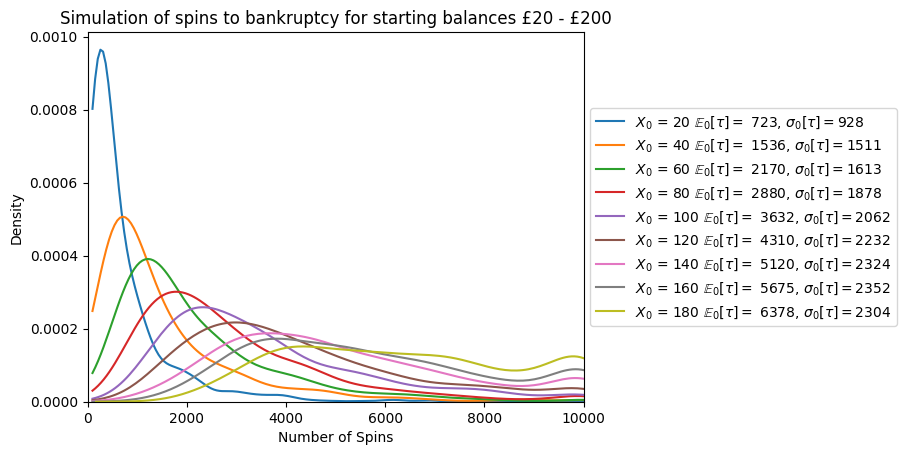

In [122]:
for i in range(20,200,20):
  spins_to_bankruptcy = []
  for j in range(1000):
    spin_list, customer_balance, customer_spins = european_roulette_colour_betting(10000,i)
    spins_to_bankruptcy.append(customer_spins)
  mean_spins = np.mean(spins_to_bankruptcy)
  st_dev_spins = np.std(spins_to_bankruptcy, ddof = 1)
  sns.kdeplot(spins_to_bankruptcy, label=f'$X_0$ = {i}, $\mathbb{{E}}_0[\\tau] =$ {mean_spins:.0f}, $\sigma_0[\\tau] = {st_dev_spins:.0f}$', clip=(100, None))


plt.title("Simulation of spins to bankruptcy for starting balances £20 - £200")
plt.xlabel('Number of Spins')
plt.ylabel('Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,10000)
plt.show()

In [112]:
def european_roulette_number_betting(number_of_spins, starting_balance):
    balance = []
    t = [0]
    running_balance = starting_balance
    running_t = 0

    for _ in range(number_of_spins):
        if running_balance <= 0:  # Stop if bankrupt
            break
        outcome = random.randint(0, 36)
        player_choice = random.randint(0,36)
        # Assume 18/37 outcomes are wins (e.g., red or black)
        if outcome == player_choice:  # Winning outcomes
            running_balance += 35  # Win pays 35 units
        else:
            running_balance -= 1  # Lose 1 unit

        # Track balance and time
        balance.append(running_balance)
        running_t += 1
        t.append(running_t)

    spins_to_bankruptcy = running_t if running_balance <= 0 else 10000  # None if not bankrupt
    return t, balance, spins_to_bankruptcy

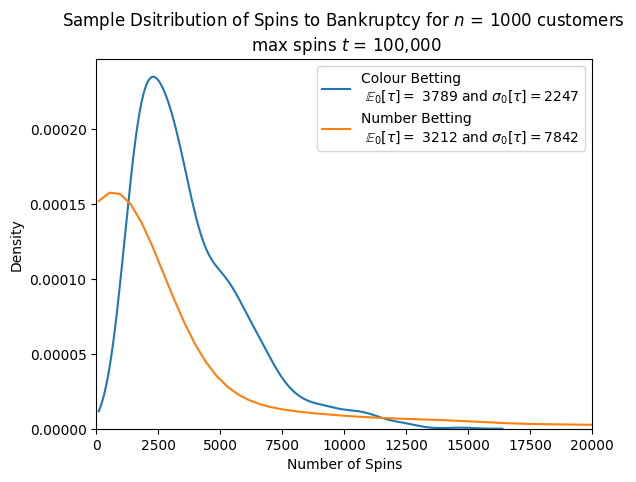

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the first density plot, restricting to valid range
sns.kdeplot(spins_to_bankruptcy, label=f'Colour Betting \n $\mathbb{{E}}_0[\\tau] =$ {mean_colour_spins:.0f} and $\sigma_0[\\tau] = {st_dev_colour_spins:.0f}$', clip=(100, None))

# Plot the second density plot on the same axes, also restricting to valid range
sns.kdeplot(spins_to_bankruptcy_nums, label=f'Number Betting \n $\mathbb{{E}}_0[\\tau] =$ {mean_number_spins:.0f} and $\sigma_0[\\tau] = {st_dev_number_spins:.0f}$', clip=(100, None))

# Add labels and title
plt.xlabel('Number of Spins')
plt.ylabel('Density')
plt.title('Sample Distribution of Spins to Bankruptcy for $n$ = 1000 customers \n max spins $t$ = 100,000')
plt.legend()  # Show legend to distinguish the plots

# Set x-axis limits
plt.xlim(0, 20000)  # Limit x-axis from 0 to 40000

plt.show()


In [113]:
# Simulate for a range of customers what their final balance is and how many spins it took to achieve (less than max if bankrupt)
closing_balances = []
spins_to_bankruptcy = []
for i in range(1000):
  spin_list, customer_balance, customer_spins = european_roulette_colour_betting(100000,100)
  closing_balances.append(customer_balance[-1])
  spins_to_bankruptcy.append(customer_spins)

In [114]:
# Repeat but for selecting numbers
closing_balances_nums = []
spins_to_bankruptcy_nums = []
for i in range(1000):
  spin_list, customer_balance, customer_spins = european_roulette_number_betting(100000,100)
  closing_balances_nums.append(customer_balance[-1])
  spins_to_bankruptcy_nums.append(customer_spins)

In [115]:
# Gather summary statistics
mean_colour_spins = np.mean(spins_to_bankruptcy)
mean_number_spins = np.mean(spins_to_bankruptcy_nums)
variance_colour_spins = np.var(spins_to_bankruptcy, ddof = 1)
variance_number_spins = np.var(spins_to_bankruptcy_nums, ddof = 1)
st_dev_colour_spins = np.std(spins_to_bankruptcy, ddof = 1)
st_dev_number_spins = np.std(spins_to_bankruptcy_nums, ddof = 1)

From this we can see the distribution varies depending on the starting balance (which is to be expected) but as the starting balance increases, more simulations reach the max spin threshold of 10,000 which thwarts any hope of using the normal disitribution to predict the probability of hitting a stopping time for any $t = \tau$

Interestingly the variance appears to converge to some limit, I suspect this is because the likelihood of hitting the max threshold increases there is a higher proportion of customers in the far right tail. Eventually as the starting balance

$$X_0 → ∞ \space \text{  then  } \space E[\tau] \rightarrow \mathrm{Var}[\tau] \rightarrow ∞ $$

Let's test that:

(9500.0, 10000.0)

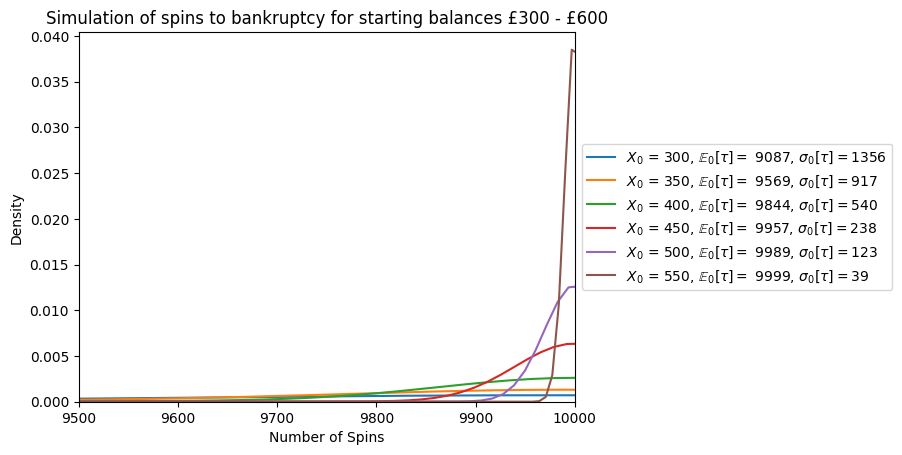

In [129]:
for i in range(300,600,50):
  spins_to_bankruptcy = []
  for j in range(1000):
    spin_list, customer_balance, customer_spins = european_roulette_colour_betting(10000,i)
    spins_to_bankruptcy.append(customer_spins)
  mean_spins = np.mean(spins_to_bankruptcy)
  st_dev_spins = np.std(spins_to_bankruptcy, ddof = 1)
  sns.kdeplot(spins_to_bankruptcy, label=f'$X_0$ = {i}, $\mathbb{{E}}_0[\\tau] =$ {mean_spins:.0f}, $\sigma_0[\\tau] = {st_dev_spins:.0f}$', clip=(100, None))


plt.title("Simulation of spins to bankruptcy for starting balances £300 - £600")
plt.xlabel('Number of Spins')
plt.ylabel('Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(9500,10000)
plt.show()

It looks more like:

<br>
$$lim_{t \to 10000} \mathbb{E}[\tau] = 10,000 \space \text{ and } \space lim_{t \to 10000} \sigma[\tau] = 0 $$
<br>

which makes intuitive sense as we expect almost everybody with a starting balance of £550 to exceed 10,000 spins

Not getting any further with this so will start to look into more theory that may help starting with Monte Carlo Simulations.
